## Plot Map - Topography & IMPROVE Network Sites
### CSU REU 2024 - Sarah Gryskewicz
***

In [1]:
import pandas as pd
import pylab as pl 
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import os, sys, glob, os.path
from netCDF4 import Dataset 
from matplotlib import rcParams
from matplotlib import rc
rc('mathtext', default='regular') 
rcParams['font.family'] = 'Tahoma'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'Tahoma'

C:\Users\C837388336\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [16]:
# access the file
in_direc = '/Users/C837388336/Desktop/REU/Data files/Massive Files/dd/2018_2023_df.txt'
filelist = sorted(glob.glob(f'{in_direc}/*.txt'))

In [20]:
# access the grid netCDF file
tfile = "C:/Users/C837388336/Desktop/REU/Data files/ETOPO1_Bed_c_gmt4.grd"
print (os.path.isfile(tfile))

etopodata = Dataset(tfile)
print (etopodata.variables.keys())
print (etopodata.variables['x'])
print (etopodata.variables['y'])
print (etopodata.variables['z'])

True
dict_keys(['x', 'y', 'z'])
<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: Longitude
    actual_range: [-180.  180.]
    units: degrees_east
unlimited dimensions: 
current shape = (21600,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: Latitude
    actual_range: [-90.  90.]
    units: degrees_north
unlimited dimensions: 
current shape = (10800,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 z(y, x)
    long_name: z
    _FillValue: -2147483648
    actual_range: [-10803.   8333.]
unlimited dimensions: 
current shape = (10800, 21600)
filling on


In [14]:
# get the variables from the netCDF file
topoin = etopodata.variables['z'][:]
tlons = etopodata.variables['x'][:]
tlats = etopodata.variables['y'][:]

print(tlons.min(), tlons.max(), tlats.min(), tlats.max())

-179.99166666666667 179.99166666666667 -89.99166666666663 89.99166666666666


## Plot from One .txt File

In [6]:
df = pd.read_csv(r'C:\Users\C837388336\Desktop\REU\Data files\Massive Files\2018_2023_df.txt')
print(df.columns)

Index(['Dataset', 'SiteCode', 'POC', 'Date', 'Latitude', 'Longitude',
       'Elevation', 'State', 'ALf_Val', 'ammNO3f_Val',
       ...
       'SIf_Val', 'NAf_Val', 'SOILf_Val', 'SRf_Val', 'SO4f_Val', 'Sf_Val',
       'TIf_Val', 'Vf_Val', 'ZNf_Val', 'ZRf_Val'],
      dtype='object', length=115)


In [10]:
tfile = "C:/Users/C837388336/Desktop/REU/Data files/ETOPO1_Bed_c_gmt4.grd"
print (os.path.isfile(tfile))

etopodata = Dataset(tfile)
print (etopodata.variables.keys())

print (etopodata.variables['x'])
print (etopodata.variables['y'])
print (etopodata.variables['z'])

# Get the variables
topoin = etopodata.variables['z'][:]
tlons = etopodata.variables['x'][:]
tlats = etopodata.variables['y'][:]

print (tlons.min(), tlons.max(), tlats.min(), tlats.max())

True
dict_keys(['x', 'y', 'z'])
<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: Longitude
    actual_range: [-180.  180.]
    units: degrees_east
unlimited dimensions: 
current shape = (21600,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: Latitude
    actual_range: [-90.  90.]
    units: degrees_north
unlimited dimensions: 
current shape = (10800,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 z(y, x)
    long_name: z
    _FillValue: -2147483648
    actual_range: [-10803.   8333.]
unlimited dimensions: 
current shape = (10800, 21600)
filling on
-179.99166666666667 179.99166666666667 -89.99166666666663 89.99166666666666


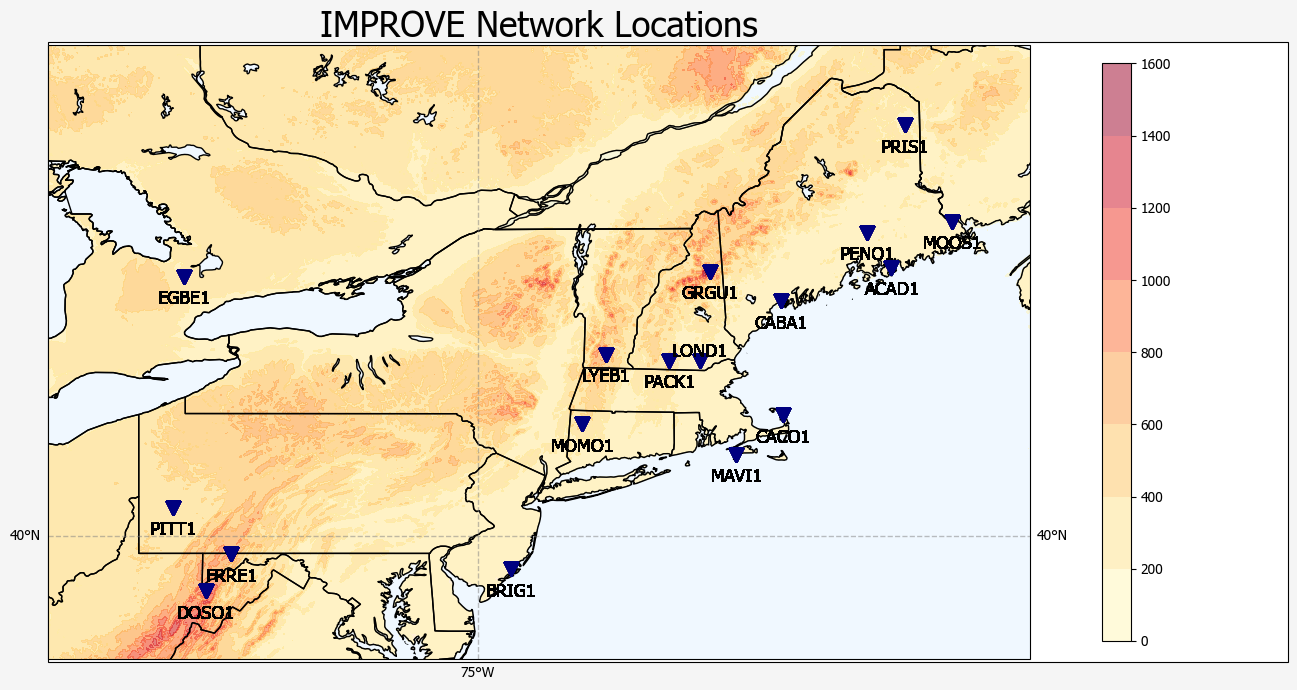

In [12]:
# plot a map of the Northeast & the IMPROVE sites
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 15), facecolor= 'gainsboro')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-82, -66, 38, 48], crs = ccrs.PlateCarree())
fig.set_facecolor('whitesmoke')
clevs = [0,200,400,600,800,1000,1200,1400,1600]
cs=plt.contourf(tlons,tlats,topoin,clevs,cmap='YlOrRd', alpha=0.5)
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-125,-115,-105,-95,-85,-75,-65])
gl.ylocator = mticker.FixedLocator([20,30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# make a colorbar 
cax,kw = mplt.colorbar.make_axes(ax,location='right',pad=0.058,shrink=0.5)
cbar = fig.colorbar(cs,cax=cax,**kw)

ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='papayawhip')
ax.add_feature(cfeature.BORDERS, edgecolor = 'black')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='aliceblue')
ax.add_feature(cfeature.LAKES, edgecolor = 'black', facecolor='aliceblue')
ax.add_feature(cfeature.STATES, edgecolor = 'black')

# plot text for each sitename
sitenames = df['SiteCode'].unique()
for k,sitename in enumerate(sitenames):
    lon = df.loc[df.SiteCode == sitename]['Longitude']
    lat = df.loc[df.SiteCode == sitename]['Latitude']
    elevation = df[df.SiteCode == sitename]['Elevation'].iloc[0]
    
    ax.plot(lon, lat, 'v', color='navy', markersize=10, linestyle='-', linewidth=2.0, label = sitename +': %s' %elevation)
    ax.set_title('IMPROVE Network Locations', fontsize=25)
    
    for x, y in zip(lon, lat):
        if sitename == 'LOND1':
            ax.text(x, y+0.28, sitename, color='black', fontsize=13, ha='center', va='top', transform=ccrs.PlateCarree())
        else:
            ax.text(x, y-0.22, sitename, color='black', fontsize=13, ha='center', va='top', transform=ccrs.PlateCarree())

fig.savefig('/Users/C837388336/Desktop/REU/Data files/Saved Plots/Maps/NE map.png', dpi =1000)